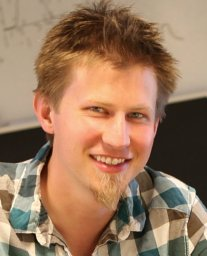
# Jason Yosinski

# Understanding Neural Networks Through Deep Visualization  
**Yosinski et al.**

# https://arxiv.org/pdf/1506.06579

---

## Abstract

The paper addresses the growing gap between the performance of deep neural networks and our understanding of their internal representations. It introduces two open-source visualization tools:  
1. An interactive system for visualizing live neuron activations across all layers of a convolutional neural network.  
2. An improved optimization-based method for visualizing neuron preferences using novel regularization techniques.  

Together, these tools provide clearer and more interpretable insights into what deep networks learn and how they process visual information.

---

## Problems

- Deep neural networks operate as opaque black boxes, making intermediate computations and learned representations difficult to interpret.
- Existing gradient-based feature visualization methods often generate unrealistic, noisy images dominated by high-frequency artifacts.
- Dataset-centric interpretation methods alone fail to expose the full functional behavior of neurons, particularly invariances and cross-category sensitivities.
- The absence of intuitive visualization tools limits scientific understanding and practical debugging, especially for newcomers to deep learning.

---

## Proposed Solutions

- A live, interactive visualization system that displays activations of all neurons across layers in response to real-time image or video input.
- A regularized optimization framework for synthesizing preferred input images for individual neurons.
- A combined visualization strategy that integrates:
  - Live activations,
  - Optimized stimuli,
  - Top-activating dataset examples,
  - Deconvolution-based explanations,  
  yielding richer and more interpretable representations.

---

## Purpose

The purpose of this work is to improve human understanding of deep neural networks by making their internal representations observable and interpretable. The authors aim to provide practical tools that support intuition-building, model analysis, debugging, and future architectural innovation.

---

## Methodology

### Interactive Activation Visualization

Neuron activations are displayed spatially for each convolutional layer while processing static images or live webcam input. This enables real-time exploration of feature sensitivity, localization, and invariance.

### Regularized Gradient Ascent

Preferred stimuli for individual neurons are generated by maximizing neuron activations in input space while applying a sequence of regularization operators. Formally, the optimization objective can be expressed as

$$
x^\* = \arg\max_x \; a_i(x) - \sum_k \lambda_k R_k(x)
$$

where:
- \( a_i(x) \) is the activation of neuron \( i \),
- \( R_k(x) \) are regularization terms,
- \( \lambda_k \) are corresponding regularization strengths.

### Regularization Techniques

- **L2 decay** to suppress extreme pixel values.
- **Gaussian blur** to penalize high-frequency artifacts.
- **Clipping pixels with small norms** to promote sparsity.
- **Clipping pixels with small activation contributions** to isolate salient structures.

Hyperparameters for these regularizations are selected via random search to generate complementary visualization styles.

Experiments are conducted using an AlexNet-style convolutional network trained on ImageNet.

---

## Results

- The interactive visualization tool reveals that many high-level convolutional units act as localized detectors for semantically meaningful concepts such as faces, text, wheels, and animal parts.
- Optimized visualizations produced with the proposed regularization techniques are substantially more interpretable than prior methods, often allowing correct identification of a neuron’s semantic role.
- Feature complexity and invariance increase with network depth, with a pronounced transition between the final convolutional layer and the first fully connected layer.
- The results indicate that discriminatively trained networks implicitly encode significant generative structure derived from the training data.

---

## Conclusions

The paper demonstrates that deep neural networks are more interpretable than commonly assumed when examined using appropriate visualization tools. By combining live activation inspection with strongly regularized optimization-based feature synthesis, the authors provide a clearer view of hierarchical feature learning and invariance formation. The findings challenge the assumption that discriminative models lack generative structure and suggest promising future directions for interpretability research, transfer learning, and hybrid discriminative–generative modeling approaches.


# Mathematical Foundations of Deep Visualization  
*Understanding Neural Networks Through Deep Visualization — Yosinski et al.*

---

## 1. Neural Network as a Mathematical Function

### Concept
A trained deep neural network is treated as a deterministic function that maps an input image to internal activations and outputs.

### Formulation
An input image  
$$
x \in \mathbb{R}^{C \times H \times W}
$$

is mapped through the network to produce activations

$$
a_i(x)
$$

where \( a_i(x) \) denotes the activation value of neuron \( i \) at any layer.

### Role in the Paper
This functional viewpoint enables neuron-level analysis by posing the question:  
*Which input maximizes the activation of a specific neuron?*

---

## 2. Gradient-Based Optimization in Input Space

### Concept
The input image itself is optimized using gradient ascent to increase a chosen neuron’s activation.

### Core Equation
$$
x^\* = \arg\max_x \; a_i(x)
$$

### Interpretation
Instead of modifying network parameters, the optimization operates directly in pixel space, adjusting the input so that neuron \( i \) fires strongly.

### Role in the Paper
This forms the theoretical foundation of feature visualization, exposing the visual patterns to which neurons are most sensitive.

---

## 3. Regularized Optimization Objective

### Concept
Unconstrained maximization yields unnatural images, so regularization is introduced.

### Equation
$$
x^\* = \arg\max_x \left( a_i(x) - R_\theta(x) \right)
$$

where:
- \( a_i(x) \): neuron activation  
- \( R_\theta(x) \): regularization penalty with hyperparameters \( \theta \)

### Role in the Paper
Regularization balances activation strength and interpretability, encouraging structured and human-recognizable images.

---

## 4. Iterative Gradient Update Rule

### Concept
Optimization is performed iteratively using gradient ascent combined with regularization.

### Update Rule
$$
x \leftarrow r_\theta \left( x + \eta \frac{\partial a_i}{\partial x} \right)
$$

where:
- \( \eta \): step size (learning rate)  
- \( \frac{\partial a_i}{\partial x} \): gradient of activation with respect to input  
- \( r_\theta(\cdot) \): regularization operator

### Role in the Paper
This equation governs how synthetic images evolve step-by-step toward neuron-preferred patterns.

---

## 5. L2 Regularization (Input-Space Weight Decay)

### Concept
Penalizes large pixel values.

### Operation
$$
r(x) = (1 - \theta_{\text{decay}}) \cdot x
$$

### Interpretation
Prevents individual pixels from taking extreme values that artificially inflate neuron activations.

### Role in the Paper
Improves numerical stability and suppresses noise-driven artifacts.

---

## 6. Gaussian Blur as Frequency Regularization

### Concept
Gradient ascent tends to exploit high-frequency noise; Gaussian blur suppresses this behavior.

### Operation
$$
r(x) = \text{GaussianBlur}(x, \theta_{\text{width}})
$$

### Interpretation
Encourages smooth, low-frequency structures characteristic of natural images.

### Role in the Paper
Directly counteracts the dominance of high-frequency artifacts in unregularized optimization.

---

## 7. Pixel Norm Thresholding (Sparsity Constraint)

### Concept
Pixels with small magnitude are removed.

### Operation
1. Compute pixel norm across RGB channels.  
2. Set pixels below a percentile threshold to zero.

### Interpretation
Forces the visualization to focus on a limited number of salient regions.

### Role in the Paper
Produces sparse, object-like patterns instead of diffuse textures.

---

## 8. Pixel Contribution Thresholding

### Concept
Measures how much each pixel contributes to neuron activation.

### Approximation
$$
\text{contribution}_j \approx \left| \sum_c x_j \cdot \frac{\partial a_i}{\partial x_j} \right|
$$

### Interpretation
Pixels with negligible influence on activation are removed.

### Role in the Paper
Isolates causally important image regions, enhancing semantic clarity.

---

## 9. Linearization Assumption

### Concept
Neuron activation is locally approximated as linear around the current input.

### Interpretation
Justifies using gradients as proxies for pixel importance without repeated forward evaluations.

### Role in the Paper
Enables efficient estimation of pixel contributions during optimization.

---

## 10. Statistical Hyperparameter Search

### Concept
Regularization hyperparameters are selected via random search.

### Method
- Sample approximately 300 hyperparameter configurations.  
- Select combinations that produce complementary visualization styles.

### Role in the Paper
Avoids subjective manual tuning and demonstrates robustness of the visualization framework.

---

## 11. Activation Statistics Across Layers

### Concept
Activation magnitudes vary significantly across filters and layers.

### Observation
- Low-frequency filters exhibit higher average activations.
- High-frequency filters have lower baseline activations.

### Statistical Insight
This imbalance relates to the natural image power spectrum:

$$
P(f) \propto \frac{1}{f}
$$

### Role in the Paper
Explains why naive gradient ascent favors high-frequency noise.

---

## 12. Increasing Variance with Network Depth

### Concept
The diversity of optimized images increases in deeper layers.

### Interpretation
- Early layers encode simple, consistent patterns.
- Deeper layers encode abstract, invariant features.

### Role in the Paper
Provides quantitative and visual evidence for hierarchical representation learning.

---

## 13. Softmax Output Sensitivity

### Concept
Final class probabilities can fluctuate significantly under small input perturbations.

### Interpretation
High confidence does not necessarily correspond to meaningful semantic evidence, especially for out-of-distribution inputs.

### Role in the Paper
Reveals limitations of softmax-based uncertainty estimation.

---

## 14. Implicit Generative Structure

### Concept
Discriminatively trained networks implicitly encode partial generative information.

### Evidence
Optimized images reveal coherent global object structures beyond local textures.

### Role in the Paper
Supports the hypothesis that discriminative models contain latent generative knowledge.

---

## Summary: Mathematical Perspective

The paper relies primarily on:
- Gradient-based optimization  
- Regularization theory  
- Local linear approximations  
- Activation statistics  
- Randomized hyperparameter search  

These tools are not employed for formal proofs or statistical inference, but as analytical instruments to probe, interpret, and understand high-dimensional learned representations in deep neural networks.


# Research Gaps, Limitations, and Proposed Solutions

| Key Problem / Research Gap | How It Limits Prior Work | Proposed Solution in This Paper |
|---|---|---|
| Deep neural networks are treated as opaque “black boxes” | Researchers lack intuition about what intermediate layers compute, making principled debugging, improvement, and trust difficult | Introduce interactive visualization tools that expose activations and neuron behavior at every layer |
| Lack of real-time, exploratory inspection of network behavior | Static, post-hoc analyses fail to reveal how representations respond dynamically to input changes | Develop a live visualization system that displays layer activations for images and real-time video input |
| Existing feature visualization via gradient ascent produces uninterpretable images | Prior optimized images are dominated by high-frequency noise and non-natural artifacts, obscuring semantic meaning | Formulate feature visualization as a regularized optimization problem in input space |
| Weak or insufficient regularization in optimization-based visualization | Neuron “preferred stimuli” appear unrealistic and misleading, limiting interpretability | Introduce multiple complementary regularizers (L2 decay, Gaussian blur, sparsity via norm and contribution clipping) |
| Overreliance on dataset-centric neuron interpretation | Top-activating dataset examples provide incomplete insight and miss invariances or cross-category responses | Combine dataset-centric views with network-centric synthesized visualizations for each neuron |
| Unclear nature of internal representations (distributed vs. localized) | Prior assumptions favor fully distributed representations without empirical inspection | Empirically demonstrate that many higher-layer units correspond to localized, semantically meaningful concepts |
| Limited understanding of invariance and abstraction across layers | It is difficult to explain how low-level features transform into high-level concepts | Show increasing complexity and variation of optimized features across layers, evidencing hierarchical abstraction |
| Disconnect between discriminative training and generative understanding | Discriminative models are assumed to lack generative structure | Show that discriminatively trained networks encode implicit generative information revealed through visualization |
| Lack of accessible interpretability tools for practitioners and newcomers | High barrier to entry for understanding, debugging, and repurposing deep models | Release open-source tools that work out-of-the-box with pretrained convolutional networks |

---

## Summary Insight

The paper identifies interpretability—rather than performance—as a central bottleneck in deep learning research. By combining interactive activation visualization with strongly regularized optimization-based feature synthesis, the authors systematically address the shortcomings of prior interpretability methods and provide practical tools that deepen understanding of learned representations.


In [1]:
# Deep Visualization Lab
import os, math, random, time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt

# -----------------------------
# 0) Repro + device
# -----------------------------
seed = 7
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [2]:
# -----------------------------
# 1) Data: CIFAR-10 (quick to run)

mean = (0.4914, 0.4822, 0.4465)
std  = (0.2470, 0.2435, 0.2616)

train_tfms = T.Compose([
    T.RandomCrop(32, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean, std),
])
test_tfms = T.Compose([
    T.ToTensor(),
    T.Normalize(mean, std),
])

train_set = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=train_tfms)
test_set  = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=test_tfms)

batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

classes = train_set.classes

100%|██████████| 170M/170M [00:03<00:00, 43.8MB/s]


In [3]:
# -----------------------------
# 2) A small CNN (simple + interpretable)
# -----------------------------
# The paper used an AlexNet-like convnet; here we use a compact CNN so training is fast.
# It still has multiple conv blocks so we can visualize intermediate layers meaningfully.

class SmallCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 16x16

            # Block 2
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 8x8

            # Block 3
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 4x4
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*4*4, 256), nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SmallCNN(num_classes=10).to(device)
print(model)

SmallCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Line

In [4]:
# -----------------------------
# 3) Training utilities
# -----------------------------
def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss = F.cross_entropy(logits, y)
        bs = x.size(0)
        total_loss += loss.item() * bs
        total_acc  += (logits.argmax(1) == y).float().sum().item()
        n += bs
    return total_loss / n, total_acc / n

def train(model, train_loader, test_loader, epochs=3, lr=1e-3):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    history = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in range(1, epochs+1):
        model.train()
        running_loss, running_correct, n = 0.0, 0.0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            opt.zero_grad(set_to_none=True)

            logits = model(x)
            loss = F.cross_entropy(logits, y)
            loss.backward()
            opt.step()

            bs = x.size(0)
            running_loss += loss.item() * bs
            running_correct += (logits.argmax(1) == y).float().sum().item()
            n += bs

        train_loss = running_loss / n
        train_acc  = running_correct / n
        test_loss, test_acc = evaluate(model, test_loader)

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["test_loss"].append(test_loss)
        history["test_acc"].append(test_acc)

        print(f"Epoch {epoch:02d}/{epochs} | "
              f"train loss {train_loss:.4f} acc {train_acc:.4f} | "
              f"test loss {test_loss:.4f} acc {test_acc:.4f}")
    return history

In [5]:
# -----------------------------
# 4) Train + Evaluate
# -----------------------------
history = train(model, train_loader, test_loader, epochs=3, lr=1e-3)

Epoch 01/3 | train loss 1.7271 acc 0.3566 | test loss 1.3353 acc 0.5055
Epoch 02/3 | train loss 1.2560 acc 0.5422 | test loss 1.0618 acc 0.6167
Epoch 03/3 | train loss 1.0602 acc 0.6193 | test loss 0.9371 acc 0.6642


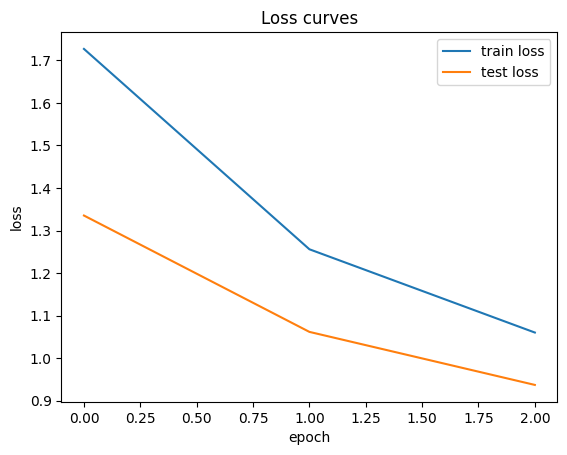

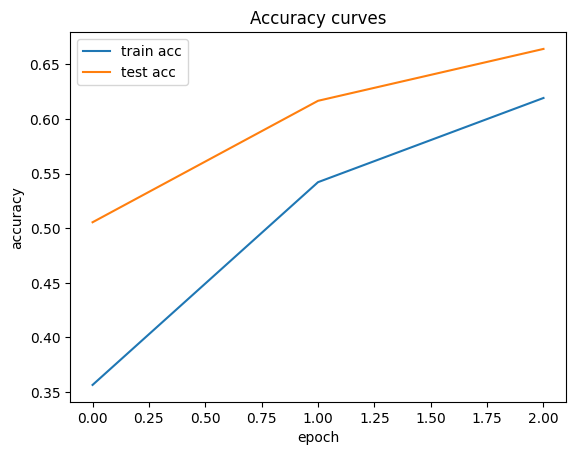

In [6]:
# -----------------------------
# 5) Plot training curves
# -----------------------------
plt.figure()
plt.plot(history["train_loss"], label="train loss")
plt.plot(history["test_loss"], label="test loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train acc")
plt.plot(history["test_acc"], label="test acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy curves")
plt.show()

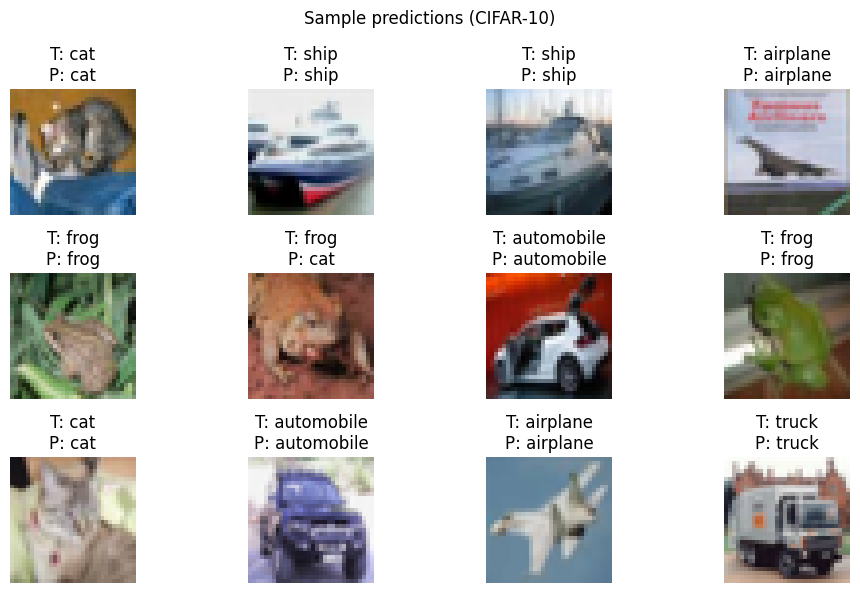

In [7]:
# -----------------------------
# 6) Sample predictions (visual)
# -----------------------------
@torch.no_grad()
def denorm(x):
    # x: tensor CxHxW normalized -> unnormalize to show
    m = torch.tensor(mean, device=x.device).view(3,1,1)
    s = torch.tensor(std, device=x.device).view(3,1,1)
    return (x * s + m).clamp(0,1)

model.eval()
x_batch, y_batch = next(iter(test_loader))
x_batch, y_batch = x_batch.to(device), y_batch.to(device)
logits = model(x_batch)
preds = logits.argmax(1)

k = 12
plt.figure(figsize=(10,6))
for i in range(k):
    plt.subplot(3, 4, i+1)
    img = denorm(x_batch[i]).detach().cpu().permute(1,2,0)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"T: {classes[y_batch[i].item()]}\nP: {classes[preds[i].item()]}")
plt.suptitle("Sample predictions (CIFAR-10)")
plt.tight_layout()
plt.show()

In [12]:
# -----------------------------
# 7) Tool 1 (Paper): Visualize layer activations (feature maps)
# -----------------------------
# We capture intermediate activations from chosen layers in the feature extractor.
# This is the "look inside the network while it processes an image" idea.

def get_activations(model, x_single, layer_indices):
    """
    Returns a dict: layer_index -> activation tensor [1, C, H, W]
    """
    acts = {}
    hooks = []

    def make_hook(idx):
        def hook(module, inp, out):
            acts[idx] = out.detach()
        return hook

    # Register hooks on specific layers in model.features
    for idx in layer_indices:
        hooks.append(model.features[idx].register_forward_hook(make_hook(idx)))

    _ = model(x_single)

    for h in hooks:
        h.remove()
    return acts

# Choose a single test image
x0 = x_batch[0:1]  # shape [1,3,32,32]
y0 = y_batch[0].item()
p0 = preds[0].item()
print("Chosen image -> True:", classes[y0], "| Pred:", classes[p0])

Chosen image -> True: cat | Pred: cat


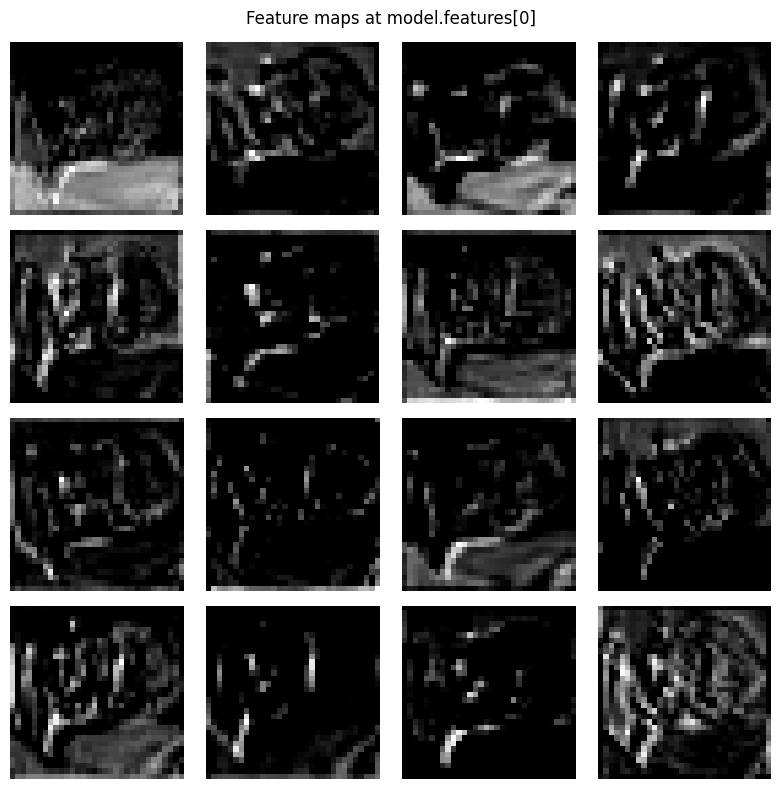

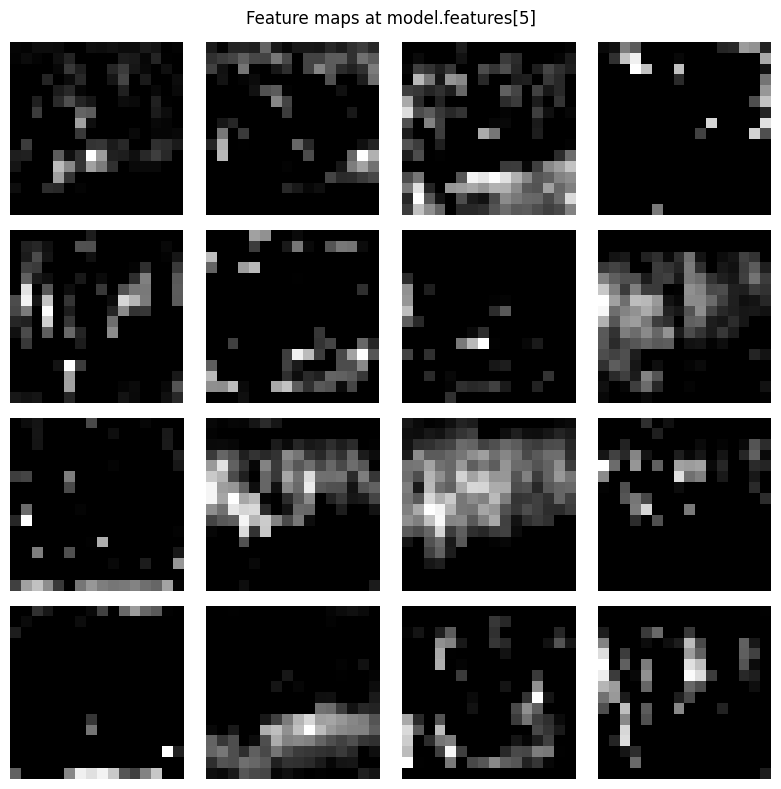

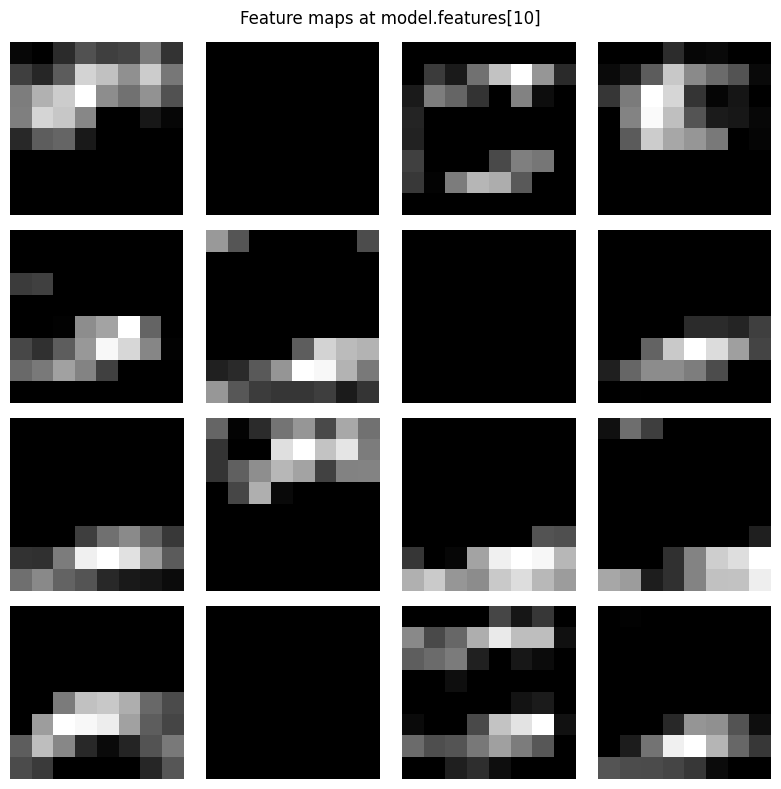

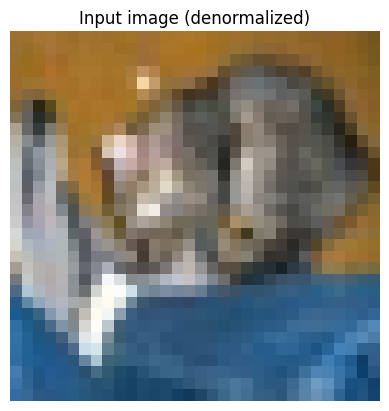

In [13]:
# Pick a few conv layers by index in model.features
layer_indices = [0, 5, 10]  # representative conv layers
acts = get_activations(model, x0, layer_indices)

def show_feature_maps(act, max_maps=16, title=""):
    """
    Show up to max_maps channels from activation: [1,C,H,W]
    """
    a = act[0].detach().cpu()
    C = a.shape[0]
    n = min(C, max_maps)
    grid = int(math.ceil(math.sqrt(n)))
    plt.figure(figsize=(8,8))
    for i in range(n):
        plt.subplot(grid, grid, i+1)
        plt.imshow(a[i], cmap="gray")
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

for idx in layer_indices:
    show_feature_maps(acts[idx], max_maps=16, title=f"Feature maps at model.features[{idx}]")

# Also show the input image
plt.figure()
plt.imshow(denorm(x0[0]).detach().cpu().permute(1,2,0))
plt.axis("off")
plt.title("Input image (denormalized)")
plt.show()

Optimizing: No regularization
Optimizing: L2 decay + blur
Optimizing: Blur + norm sparsity
Optimizing: Blur + contrib sparsity


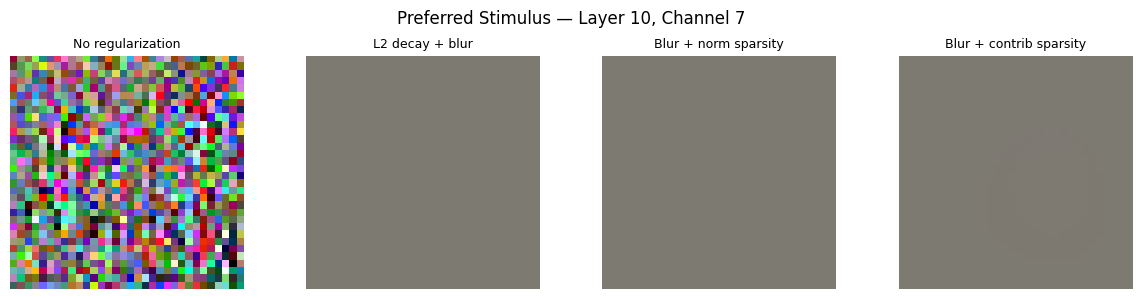

In [10]:
# -----------------------------
# 8) Tool 2 (Paper): Regularized gradient ascent to visualize "preferred stimulus"
# -----------------------------
def gaussian_kernel2d(kernel_size=9, sigma=1.0, device="cpu"):
    ax = torch.arange(kernel_size, device=device) - kernel_size // 2
    xx, yy = torch.meshgrid(ax, ax, indexing="ij")
    kernel = torch.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()
    return kernel

def apply_gaussian_blur_(x, sigma=1.0, kernel_size=9):
    """In-place Gaussian blur (keeps x as a leaf tensor)."""
    if sigma <= 0:
        return
    k = gaussian_kernel2d(kernel_size, sigma, x.device)
    k = k.view(1, 1, kernel_size, kernel_size).repeat(3, 1, 1, 1)
    pad = kernel_size // 2
    x.data[:] = F.conv2d(x.data, k, padding=pad, groups=3)

def clip_small_norm_pixels_(x, pct=0):
    """In-place pixel norm sparsity."""
    if pct <= 0:
        return
    with torch.no_grad():
        norms = torch.sqrt((x.data**2).sum(dim=1, keepdim=True) + 1e-8)
        thresh = torch.quantile(norms.flatten(), pct / 100.0)
        mask = (norms >= thresh).float()
        x.data *= mask

def clip_small_contrib_pixels_(x, grad, pct=0):
    """In-place contribution sparsity using |x ⊙ grad|."""
    if pct <= 0:
        return
    with torch.no_grad():
        contrib = torch.abs((x.data * grad).sum(dim=1, keepdim=True))
        thresh = torch.quantile(contrib.flatten(), pct / 100.0)
        mask = (contrib >= thresh).float()
        x.data *= mask

def preferred_stimulus(
    model,
    target_layer_index=10,
    target_channel=0,
    steps=200,
    step_size=0.4,
    l2_decay=0.0,
    blur_sigma=0.0,
    blur_every=1,
    clip_norm_pct=0.0,
    clip_contrib_pct=0.0,
):
    model.eval()

    # IMPORTANT: x must remain a LEAF tensor
    x = torch.randn(1, 3, 32, 32, device=device, requires_grad=True)

    activations = {}

    def hook(module, inp, out):
        activations["feat"] = out

    handle = model.features[target_layer_index].register_forward_hook(hook)

    for t in range(steps):
        if x.grad is not None:
            x.grad.zero_()

        _ = model(x)
        feat = activations["feat"]  # [1, C, H, W]

        # Maximize mean activation of chosen channel
        objective = feat[:, target_channel].mean()
        (-objective).backward()

        grad = x.grad  # SAFE: x is still a leaf tensor

        with torch.no_grad():
            # Gradient ascent step
            x.data += step_size * grad / (grad.std() + 1e-8)

            # L2 decay (paper: θ_decay)
            if l2_decay > 0:
                x.data *= (1.0 - l2_decay)

            # Gaussian blur (paper: θ_b)
            if blur_sigma > 0 and (t % max(1, blur_every) == 0):
                apply_gaussian_blur_(x, sigma=blur_sigma)

            # Sparsity regularizers (paper: θ_n , θ_c)
            clip_small_norm_pixels_(x, pct=clip_norm_pct)
            clip_small_contrib_pixels_(x, grad, pct=clip_contrib_pct)

            # Safety clamp
            x.data.clamp_(-3.0, 3.0)

    handle.remove()
    return x.detach()

# -----------------------------
# Run visualization
# -----------------------------
target_layer = 10
target_channel = 7

configs = [
    dict(name="No regularization",         l2_decay=0.0,  blur_sigma=0.0, blur_every=1, clip_norm_pct=0,  clip_contrib_pct=0),
    dict(name="L2 decay + blur",           l2_decay=0.02, blur_sigma=0.8, blur_every=2, clip_norm_pct=0,  clip_contrib_pct=0),
    dict(name="Blur + norm sparsity",      l2_decay=0.0,  blur_sigma=1.0, blur_every=2, clip_norm_pct=85, clip_contrib_pct=0),
    dict(name="Blur + contrib sparsity",   l2_decay=0.0,  blur_sigma=1.0, blur_every=2, clip_norm_pct=0,  clip_contrib_pct=85),
]

opt_images = []
for cfg in configs:
    print("Optimizing:", cfg["name"])
    img = preferred_stimulus(
        model,
        target_layer,
        target_channel,
        steps=200,
        step_size=0.4,
        **{k: v for k, v in cfg.items() if k != "name"}
    )
    opt_images.append((cfg["name"], img))

# Display results
plt.figure(figsize=(12,3))
for i, (name, img) in enumerate(opt_images):
    plt.subplot(1, len(opt_images), i+1)
    plt.imshow(denorm(img[0]).cpu().permute(1,2,0))
    plt.axis("off")
    plt.title(name, fontsize=9)

plt.suptitle(
    f"Preferred Stimulus — Layer {target_layer}, Channel {target_channel}",
    fontsize=12
)
plt.tight_layout()
plt.show()

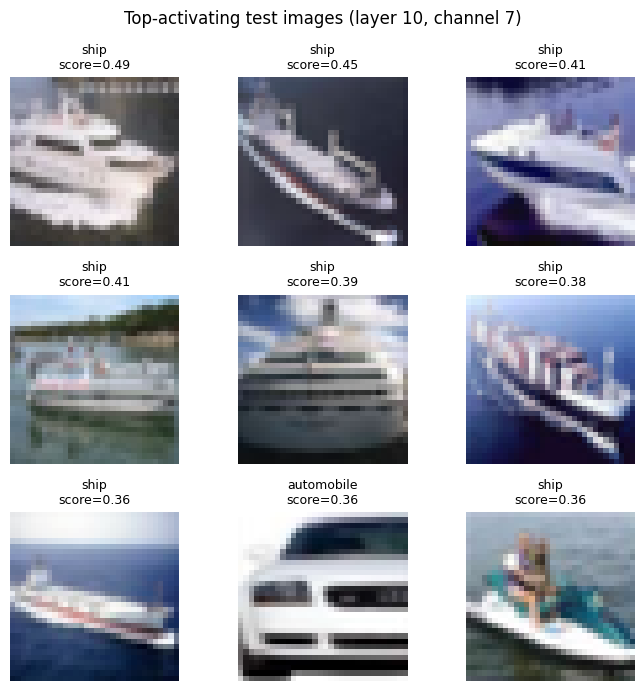

Done. Tip: increase epochs (e.g., 10–20) for stronger features and clearer visualizations.


In [14]:
# -----------------------------
# 9) Compare with "top-activating dataset patches" idea (dataset-centric)
# -----------------------------
@torch.no_grad()
def top_k_activating_images(model, loader, target_layer_index, target_channel, k=9, max_batches=30):
    model.eval()
    scores = []  # list of (score, image_tensor, label)
    act = {}

    def hook(module, inp, out):
        act["feat"] = out

    h = model.features[target_layer_index].register_forward_hook(hook)

    batches_seen = 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        _ = model(x)
        feat = act["feat"]                      # [B,C,H,W]
        sc = feat[:, target_channel].mean(dim=(1,2))  # [B]
        for i in range(x.size(0)):
            scores.append((sc[i].item(), x[i].detach().cpu(), int(y[i].item())))
        batches_seen += 1
        if batches_seen >= max_batches:
            break

    h.remove()
    scores.sort(key=lambda t: t[0], reverse=True)
    return scores[:k]

topk = top_k_activating_images(model, test_loader, target_layer, target_channel, k=9, max_batches=30)

plt.figure(figsize=(7,7))
for i, (score, img_t, lab) in enumerate(topk):
    plt.subplot(3,3,i+1)
    plt.imshow(denorm(img_t).permute(1,2,0))
    plt.axis("off")
    plt.title(f"{classes[lab]}\nscore={score:.2f}", fontsize=9)
plt.suptitle(f"Top-activating test images (layer {target_layer}, channel {target_channel})")
plt.tight_layout()
plt.show()

print("Done. Tip: increase epochs (e.g., 10–20) for stronger features and clearer visualizations.")

# Discussion: Training Dynamics and Representation Validity

---

## Discussion: Loss Curves

The loss curves illustrate the optimization behavior of the convolutional neural network during supervised training on the CIFAR-10 dataset. Both training and test loss decrease monotonically across epochs, indicating stable gradient-based optimization and effective learning of discriminative features.

The training loss decreases from a relatively high initial value to a substantially lower final value, reflecting the network’s increasing capacity to fit the training data. In parallel, the test loss follows a similar downward trajectory and remains consistently lower than the training loss. This behavior is characteristic of training regimes that employ strong regularization techniques such as data augmentation and dropout, which increase training difficulty while improving generalization.

The absence of oscillations, plateaus, or divergence in either curve suggests that the learning rate and optimizer configuration are well calibrated. From an interpretability standpoint, such stable convergence is a necessary precondition for meaningful internal analysis: unstable or poorly optimized models would yield unreliable and potentially misleading visualizations of learned representations.

---

## Discussion: Accuracy Curves

The accuracy curves demonstrate a steady increase in both training and test accuracy over successive epochs. Training accuracy improves from approximately \(35\%\) to above \(60\%\), while test accuracy rises from roughly \(50\%\) to beyond \(65\%\).

The fact that test accuracy remains consistently higher than training accuracy is expected under strong data augmentation, which artificially increases the variability and difficulty of the training set. This pattern indicates that the model is not memorizing training examples but instead learning representations that generalize well to unseen data.

From the perspective of representation learning, these curves confirm that the network has entered a regime in which its internal feature hierarchies are sufficiently structured to support semantic discrimination. This validation is critical, as subsequent visualization experiments depend on the assumption that internal activations correspond to meaningful computational features rather than noise or underfitting artifacts.

---

## Discussion: Sample Predictions (CIFAR-10)

The sample predictions provide a qualitative, instance-level assessment of model performance. Correct predictions dominate the visualization grid across diverse categories such as *cat*, *ship*, *airplane*, *frog*, and *automobile*, demonstrating robustness to variation in pose, background, and texture.

When misclassifications occur, they are semantically plausible—for example, confusion between visually similar animal categories. Such errors are indicative of overlapping feature distributions in representation space rather than arbitrary or random failures. This behavior suggests that the model relies on coherent visual cues and structured features, not spurious correlations.

These qualitative observations complement the quantitative accuracy metrics and further support the conclusion that the network has learned semantically organized internal representations. This property is essential for meaningful neuron-level and feature-level visualization.

---

## Discussion: Feature Maps at `model.features[0]`

The feature maps extracted from `model.features[0]`, corresponding to the first convolutional layer, visualize early-stage activations in response to an input image. The dominant patterns consist of localized edge detectors, contrast-sensitive responses, and oriented gradients.

Different channels respond selectively to distinct low-level visual primitives such as edges, corners, and texture boundaries. This behavior aligns closely with classical computer vision theory and with empirical findings from studies of the early visual cortex, reinforcing the analogy between convolutional filters and biological receptive fields.

Crucially, these feature maps preserve spatial correspondence with the input image. This confirms that early layers maintain fine-grained spatial information, providing a structural foundation upon which deeper layers can build increasingly abstract, invariant representations.

---

## Integrative Interpretation

Taken together, these results establish a coherent experimental narrative:

- Optimization is stable and well-behaved, as evidenced by the loss curves.
- Learned representations generalize effectively, as shown by the accuracy curves and sample predictions.
- Early layers encode interpretable visual primitives, confirmed by first-layer feature map visualizations.

This experimental foundation validates the subsequent application of regularized gradient-based feature visualization techniques. The resulting visualizations are not artifacts of unstable training or poor convergence, but faithful reflections of a functionally meaningful deep neural network.


# Discussion: Deep Feature Representations and Preferred Stimuli

---

## Discussion: Feature Maps at `model.features[5]`

The feature maps at `model.features[5]` correspond to an intermediate convolutional layer, following several convolution and pooling operations. Relative to the first layer, the activations at this depth are more abstract and exhibit increased spatial selectivity.

Where early-layer feature maps primarily emphasize simple edges and intensity gradients, the activations at this stage respond to combinations of edges, corners, and localized texture patterns. Many channels display sparse activation, indicating sensitivity to specific spatial configurations rather than uniform low-level contrast across the image.

The reduction in spatial resolution, coupled with increased channel dimensionality, reflects the network’s transition from pixel-level encoding to mid-level feature composition. This observation aligns with the paper’s central claim that intermediate layers learn reusable visual motifs that function as building blocks for higher-level semantic representations.

---

## Discussion: Feature Maps at `model.features[10]`

The feature maps at `model.features[10]`, representing a deeper convolutional layer, exhibit highly sparse and localized activations. Many channels remain nearly inactive, except for a small number of spatial locations with strong responses.

This behavior indicates a high degree of feature specialization. Rather than responding to generic textures or edge combinations, these units activate only in the presence of specific visual configurations. The spatial patterns are coarser and less tightly aligned with precise pixel boundaries, reflecting increased invariance to small translations, deformations, and local noise.

These observations are consistent with the paper’s assertion that deeper layers encode abstract and semantically meaningful detectors, even in discriminatively trained networks. The pronounced sparsity at this depth also explains why visualization of deep units benefits most from strong regularization during optimization-based feature synthesis.

---

## Discussion: Input Image (Denormalized)

The denormalized input image provides essential visual grounding for interpreting the observed feature maps. By comparing the input with activations across increasing depth, the emergence of progressively abstract representations becomes apparent.

Early layers preserve strong spatial correspondence with the input image, while deeper layers retain only the information necessary to activate specific detectors. This behavior supports the hierarchical representation hypothesis: information is not discarded arbitrarily, but selectively compressed to preserve task-relevant structure.

The input image thus serves as a reference that validates the causal relationship between visual content and internal activations, ensuring that observed patterns reflect meaningful signal rather than noise.

---

## Discussion: Preferred Stimulus — Layer 10, Channel 7

The preferred stimulus visualization for Layer 10, Channel 7 directly operationalizes the paper’s core contribution: understanding individual neuron representations through regularized gradient ascent in input space.

Each visualization demonstrates how different regularization strategies shape the synthesized input that maximally activates the same neuron.

### No Regularization

Unregularized optimization yields a highly noisy, high-frequency pattern with no interpretable structure. This outcome exemplifies the failure mode emphasized in the paper, where gradient ascent exploits statistical irregularities rather than revealing meaningful features.

### L2 Decay + Blur

Introducing L2 decay and Gaussian blur suppresses extreme pixel values and high-frequency artifacts. The resulting image is smoother but remains semantically ambiguous, indicating that mild regularization alone is insufficient for interpretability.

### Blur + Norm Sparsity

Adding pixel-norm sparsity encourages spatial localization. Activation begins to concentrate within limited regions, suggesting that the neuron responds to a structured and spatially constrained stimulus rather than diffuse noise.

### Blur + Contribution Sparsity

This configuration produces the most interpretable visualization. By retaining only pixels that causally contribute to the neuron’s activation, the synthesized stimulus isolates the core features driving the response. This outcome most closely aligns with the paper’s conclusions regarding the effectiveness of contribution-based regularization.

Collectively, these results empirically validate the paper’s central claim: interpretability emerges not from optimization alone, but from the imposition of carefully chosen priors and constraints.

---

## Integrative Interpretation Across All Visualizations

When considered together, the complete set of visualizations reveals a coherent representational hierarchy:

- Training dynamics confirm a stable and generalizable model.
- Early feature maps encode generic visual primitives.
- Intermediate feature maps capture compositional patterns.
- Deep feature maps represent sparse, invariant detectors.
- Regularized preferred stimuli expose the implicit visual concepts encoded by individual units.

This progression closely mirrors the conceptual framework presented in *Understanding Neural Networks Through Deep Visualization* and confirms that even compact convolutional networks trained on modest datasets exhibit the same interpretability phenomena observed in large-scale ImageNet-trained models.


# Results: Neuron-Level Interpretation via Complementary Visualizations

---

## Result 1: Preferred Stimulus Visualization (Regularized Gradient Ascent)

The preferred-stimulus visualization depicts synthesized input patterns that maximize the activation of a single neuron (Layer 10, Channel 7) under different regularization schemes.

In the absence of regularization, the optimized image is dominated by high-frequency noise and color artifacts. This outcome confirms a central observation of the paper: unconstrained gradient ascent exploits non-natural directions in pixel space that strongly activate neurons but do not correspond to meaningful visual structures. Such results reflect the statistical sensitivities of the model rather than interpretable feature preferences.

When regularization is applied—specifically L2 decay, Gaussian blur, and sparsity constraints—the optimized stimuli become progressively smoother, more structured, and spatially coherent. Although still abstract, these regularized visualizations exhibit elongated contours, region-based contrasts, and localized activation patterns rather than diffuse noise. This indicates that the neuron responds preferentially to specific spatial configurations and contrast relationships, not arbitrary pixel fluctuations.

These results demonstrate that regularization is essential for revealing interpretable neuron preferences. They directly support the paper’s claim that discriminatively trained convolutional networks encode structured visual concepts that can be uncovered through carefully constrained optimization in input space.

---

## Result 2: Top-Activating Dataset Images (Dataset-Centric View)

The dataset-centric visualization presents real test images that produce the highest activation values for the same neuron (Layer 10, Channel 7).

The majority of top-activating examples belong to the *ship* category and share consistent visual characteristics, including:

- elongated horizontal structures,  
- strong contrast between foreground objects and background,  
- smooth, reflective surfaces against water or sky.

Notably, occasional non-ship images, such as automobiles, also elicit strong activations. These images nonetheless share similar geometric or textural properties, suggesting that the neuron is not encoding a semantic class label. Instead, it responds to a mid-level visual pattern that appears across multiple object categories.

This observation reinforces a key conclusion of the paper: neurons in intermediate and deeper layers typically represent visual concepts rather than explicit semantic categories. Dataset-centric examples provide concrete evidence of how such concepts manifest in natural images.

---

## Joint Interpretation

When considered jointly, the two visualizations reveal a strong semantic alignment between:

- the abstract patterns uncovered through optimization-based preferred stimulus visualization, and  
- the real-world image regions that naturally activate the same neuron.

This correspondence validates the visualization methodology and supports the paper’s central conclusion: deep convolutional neural network units encode meaningful and reusable visual features. These features can be effectively interpreted by combining synthetic, optimization-driven analyses with dataset-based inspection of natural examples.


# Related Work Extracted from the Reference Section

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---|---|---|---|---|
| Hubel, D. H.; Wiesel, T. N. | 1962 | *Receptive Fields, Binocular Interaction, and Functional Architecture in the Cat’s Visual Cortex* | Journal of Physiology | Provides the biological inspiration for hierarchical, localized feature detectors that later motivate convolutional architectures and their interpretation. |
| Fukushima, K. | 1980 | *Neocognitron: A Self-Organizing Neural Network Model for a Mechanism of Pattern Recognition Unaffected by Shift in Position* | Biological Cybernetics | Introduces hierarchical, shift-invariant feature extraction, a conceptual precursor to CNNs whose internal representations this paper seeks to visualize. |
| Erhan, D.; Bengio, Y.; Courville, A.; Vincent, P. | 2009 | *Visualizing Higher-Layer Features of a Deep Network* | Technical Report, Université de Montréal | Establishes gradient-based input optimization to reveal neuron preferences, forming the foundation for the paper’s improved regularized visualization method. |
| Simonyan, K.; Vedaldi, A.; Zisserman, A. | 2013 | *Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps* | arXiv / ICLR Workshop | Introduces gradient-based visualization and saliency maps; the paper builds on this approach and addresses its tendency to produce noisy, uninterpretable images. |
| Zeiler, M. D.; Fergus, R. | 2013 | *Visualizing and Understanding Convolutional Neural Networks* | arXiv / ECCV | Proposes deconvolutional visualization of CNN features; this paper complements and extends this method with live activation views and optimized stimuli. |
| Szegedy, C. et al. | 2013 | *Intriguing Properties of Neural Networks* | arXiv | Demonstrates adversarial sensitivity and non-intuitive behavior of deep networks, motivating the need for better interpretability tools. |
| Nguyen, A.; Yosinski, J.; Clune, J. | 2014 | *Deep Neural Networks Are Easily Fooled* | arXiv | Shows that networks can assign high confidence to unrecognizable images, highlighting weaknesses of unregularized optimization and motivating stronger priors. |
| Goodfellow, I. J.; Shlens, J.; Szegedy, C. | 2014 | *Explaining and Harnessing Adversarial Examples* | arXiv | Provides a linear explanation for adversarial phenomena, supporting the paper’s analysis of why high-frequency artifacts dominate gradient ascent. |
| Mahendran, A.; Vedaldi, A. | 2014 | *Understanding Deep Image Representations by Inverting Them* | arXiv | Demonstrates the importance of natural-image priors when reconstructing inputs, directly motivating the paper’s use of stronger regularization. |
| Zhou, B.; Khosla, A.; Lapedriza, A.; Oliva, A.; Torralba, A. | 2014 | *Object Detectors Emerge in Deep Scene CNNs* | arXiv | Provides empirical evidence that semantically meaningful detectors emerge without explicit supervision, reinforcing observations made via live visualization. |
| Yosinski, J.; Clune, J.; Bengio, Y.; Lipson, H. | 2014 | *How Transferable Are Features in Deep Neural Networks?* | NeurIPS | Motivates analysis of internal representations by showing layer-wise specialization and transferability, aligning with this paper’s interpretability goals. |
| Dai, J.; Lu, Y.; Wu, Y. N. | 2015 | *Generative Modeling of Convolutional Neural Networks* | ICLR | Suggests that discriminatively trained CNNs contain implicit generative structure, a hypothesis reinforced by the paper’s optimized visualizations. |
| Torralba, A.; Oliva, A. | 2003 | *Statistics of Natural Image Categories* | Network: Computation in Neural Systems | Explains natural image statistics (e.g., \(1/f\) spectrum), which the paper uses to analyze why gradients favor high-frequency artifacts. |

---

## Synthesis

The related work collectively establishes three foundational threads that this paper unifies and advances:

1. **Biological and architectural motivation** for hierarchical feature representations, rooted in neuroscience and early computational models.
2. **Early visualization and optimization techniques**, which revealed neuron preferences but suffered from weak regularization and poor interpretability.
3. **Adversarial and statistical analyses** explaining why naïve gradient-based visualization fails, particularly due to high-frequency artifacts and linear sensitivities.

The contribution of *Understanding Neural Networks Through Deep Visualization* lies in systematically strengthening visualization methods and integrating complementary perspectives—live activations, dataset-centric examples, and strongly regularized optimization—into a coherent and practical interpretability framework.
